<a href="https://colab.research.google.com/github/tushargarg18/Computational_Intelligence/blob/main/lab3_stud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

Extract a subset of traning samples from the MNIST handwriten signatures. Create a small convolution neural network with two convolution layers, two pool layers, flatten, dense layer and softmax layer to classify the images. Find out classification error for learning set and testing set.



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

print(y_train[:10])

print(np.unique(y_train))

(60000, 28, 28)
(10000, 28, 28)
(60000,)
[5 0 4 1 9 2 1 3 1 4]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
y_train_filter = np.where((y_train == 0) | (y_train == 1) | (y_train == 2))[0]
y_test_filter = np.where((y_test == 0) | (y_test == 1) | (y_test == 2))[0]


y_train = y_train[y_train_filter]
y_test = y_test[y_test_filter]
X_train = X_train[y_train_filter]
X_test = X_test[y_test_filter]

x_val = X_train[:100,:]
y_val = y_train[:100]

X_train = X_train[100:,:]
y_train = y_train[100:]

print(y_train[:5])

[0 0 2 1 1]


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), input_shape = (28,28, 1), activation = 'relu'),
    layers.MaxPool2D(pool_size = (2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPool2D(pool_size = (2,2)),
    layers.Flatten(),
    layers.Dense(20, activation = 'relu'),
    layers.Dense(3, activation = 'softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam

learning = Adam(learning_rate = 0.001)

model.compile(
    optimizer = learning,
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(X_train, y_train, epochs = 25, batch_size = 32, shuffle = True, validation_split = 0.2, validation_data = (x_val, y_val))

Epoch 1/25
579/579 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.9996 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 2.0109e-06
Epoch 2/25
579/579 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9992 - loss: 0.0043 - val_accuracy: 0.9900 - val_loss: 0.0414
Epoch 3/25
579/579 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9984 - loss: 0.0092 - val_accuracy: 0.9900 - val_loss: 0.0405
Epoch 4/25
579/579 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.9989 - loss: 0.0109 - val_accuracy: 1.0000 - val_loss: 3.4143e-04
Epoch 5/25
579/579 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.9997 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 6/25
579/579 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.9997 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 3.4671e-04
Epoch 7/25
579/579 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9996 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 9.1780e-04
Epoch 8/25
579/579 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.9998 -

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9988 - loss: 0.0070


In [ ]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


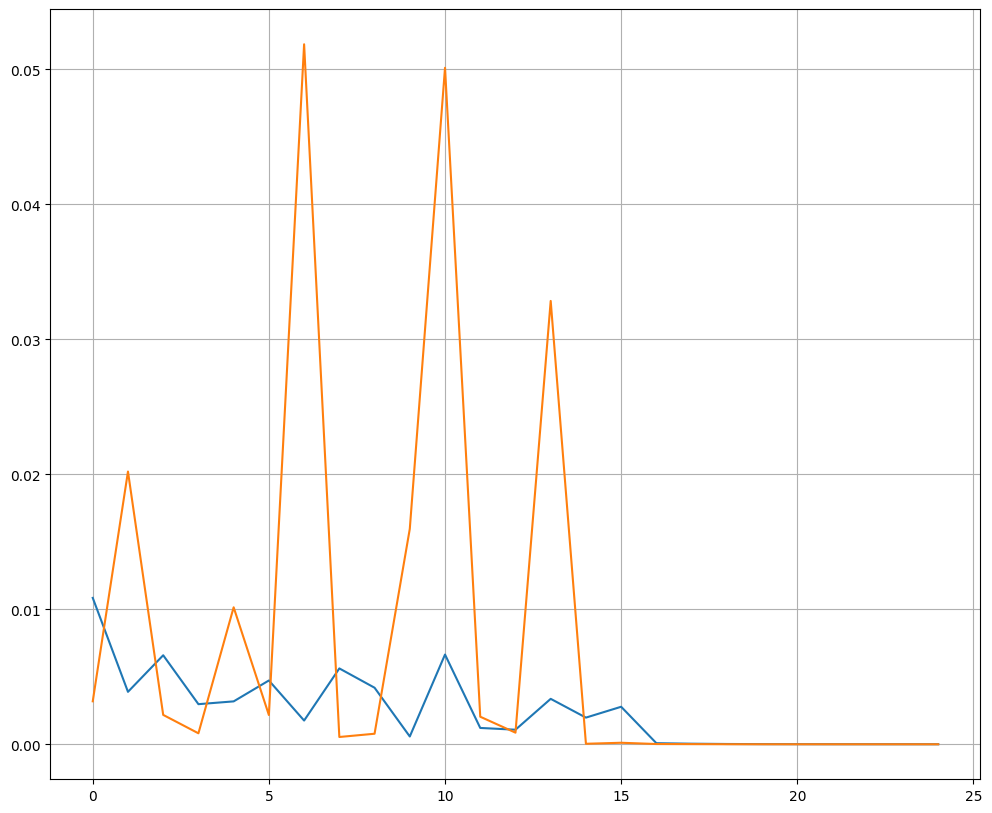

In [ ]:
fig = plt.figure(figsize = (12,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

In [ ]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values (0–255 → 0–1)
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Reshape for CNN input (samples, height, width, channels)
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test, -1)

# Extract a small subset for faster training (e.g., 10,000 training, 2,000 testing)
x_train_small = x_train[:10000]
y_train_small = y_train[:10000]
x_test_small  = x_test[:2000]
y_test_small  = y_test[:2000]

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(20, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train_small, y_train_small,
                    epochs=5,
                    batch_size=64,
                    validation_data=(x_test_small, y_test_small),
                    verbose=2)

Epoch 1/5
157/157 - 10s - 64ms/step - accuracy: 0.7919 - loss: 0.7010 - val_accuracy: 0.9070 - val_loss: 0.3010
Epoch 2/5
157/157 - 9s - 60ms/step - accuracy: 0.9492 - loss: 0.1778 - val_accuracy: 0.9530 - val_loss: 0.1658
Epoch 3/5
157/157 - 7s - 43ms/step - accuracy: 0.9639 - loss: 0.1284 - val_accuracy: 0.9540 - val_loss: 0.1473
Epoch 4/5
157/157 - 8s - 54ms/step - accuracy: 0.9722 - loss: 0.0904 - val_accuracy: 0.9655 - val_loss: 0.1144
Epoch 5/5
157/157 - 7s - 42ms/step - accuracy: 0.9760 - loss: 0.0774 - val_accuracy: 0.9655 - val_loss: 0.1065


In [ ]:
train_loss, train_acc = model.evaluate(x_train_small, y_train_small, verbose=0)
test_loss, test_acc   = model.evaluate(x_test_small, y_test_small, verbose=0)

train_error = 1 - train_acc
test_error  = 1 - test_acc

print(f"Training accuracy: {train_acc:.4f}, classification error: {train_error:.4f}")
print(f"Testing accuracy:  {test_acc:.4f}, classification error: {test_error:.4f}")

Training accuracy: 0.9812, classification error: 0.0188
Testing accuracy:  0.9655, classification error: 0.0345


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


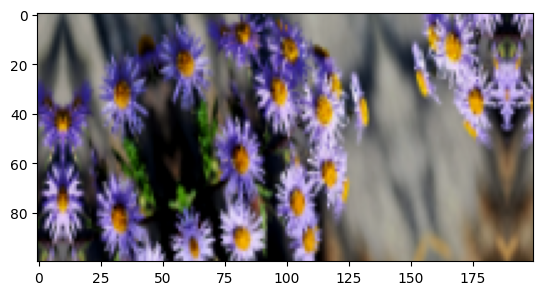

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import load_img, img_to_array
from tensorflow.keras import layers

image = load_img("/content/drive/MyDrive/Colab Notebooks/wormwood-some-competition-2947198_1280.jpg")
img_arr = img_to_array(image)

augment = tf.keras.Sequential([
    layers.Rescaling(1./255),
    layers.Resizing(100, 200),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(.5, .2),
    layers.RandomContrast(0.3),
    layers.RandomBrightness(0.2, value_range = (0,1))
])

result = augment(img_arr)
plt.imshow(result)

# Task 2

Create an autoencoder for MNIST fashion dataset. The input and the output is the same image of a number 28x28 pixels.



In [19]:
# Example
import tensorflow as tf
import numpy as np
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
# import random as rnd

# t_x = []
# t_y = []
# sz = len(train_images)
# for i in range(20):
#    idx = rnd.randint(0,sz-1)
#    for c in range(10):
#      while train_labels[idx] != c:
#        idx = rnd.randint(0,sz-1)
#      t_x += [np.ndarray.flatten(train_images[idx])]
#      t_y += [train_labels[idx]]

# t_x = np.array(t_x, dtype=np.float32)/255.0

# print(len(t_x))
# print(len(t_y))


200
200


In [20]:
import numpy as np
import random as rnd

t_x = []
t_y = []

idx_list = {c: np.where(train_images == c)[0] for c in range(3)}

for c in range(3):
  selected_idx = rnd.sample(list(idx_list[c]), 100)
  for idx in selected_idx:
    t_x += [np.ndarray.flatten(train_images[idx])]
    t_y += [train_labels[idx]]

t_x = np.array(t_x, dtype=np.float32)/255.0

print(len(t_x))
print(len(t_y))


300
300



## Subtask 1

 Use two dense layers (hidden and output). Hidden layer with 2 neurons, output layer with 784 neurons. Plot the response of hidden neurons in scatter plot, number categories distinquish by colors.


In [ ]:
# # Normalize and flatten
# x_train = train_images.astype('float32') / 255.0
# x_test  = test_images.astype('float32') / 255.0
# x_train = x_train.reshape((len(x_train), 28*28))
# x_test  = x_test.reshape((len(x_test), 28*28))

# # ---- Build the Autoencoder ----
# from tensorflow.keras import layers, models

# input_img = tf.keras.Input(shape=(784,))

# # Hidden (bottleneck) layer with 2 neurons
# encoded = layers.Dense(2, activation='relu')(input_img)

# # Output layer reconstructs the image
# decoded = layers.Dense(784, activation='sigmoid')(encoded)

# # Autoencoder model
# autoencoder = tf.keras.Model(input_img, decoded)

# # Encoder model (for extracting 2D hidden features)
# encoder = tf.keras.Model(input_img, encoded)

# # Compile
# autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# # ---- Train ----
# history = autoencoder.fit(
#     x_train, x_train,
#     epochs=20,
#     batch_size=256,
#     shuffle=True,
#     validation_data=(x_test, x_test),
#     verbose=2
# )

# # ---- Encode test images into 2D latent space ----
# encoded_imgs = encoder.predict(x_test)
# print("Encoded shape:", encoded_imgs.shape)

# # ---- Plot hidden layer responses ----
# plt.figure(figsize=(8,6))
# scatter = plt.scatter(encoded_imgs[:,0], encoded_imgs[:,1],
#                       c=test_labels, cmap='tab10', s=10)
# plt.colorbar(scatter, ticks=range(10))
# plt.title('2D Hidden Layer Representation of Fashion-MNIST')
# plt.xlabel('Hidden neuron 1')
# plt.ylabel('Hidden neuron 2')
# plt.show()


In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Input((784,)),

    # Encoder
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(2, activation="relu"),  # bottleneck

    # Decoder
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(784, activation="sigmoid")  # output
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 784)            │       201,488 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 435,858 (1.66 MB)

 Trainable params: 435,858 (1.66 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
from google import colab
colab.drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


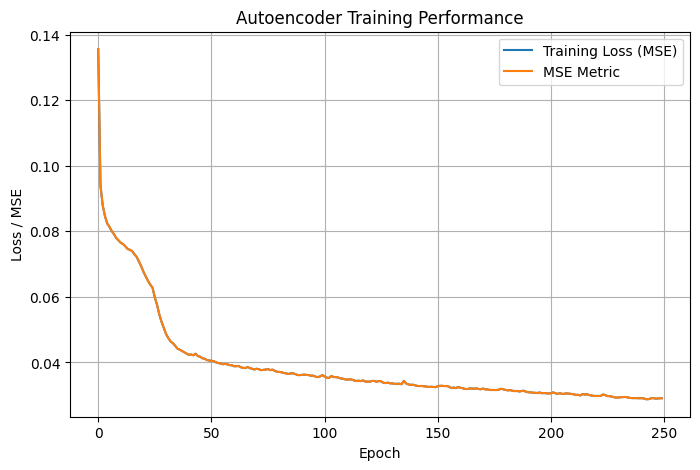

In [23]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005), loss = "mse", metrics = ["mse"])

hist = model.fit(t_x, t_x, epochs=250, batch_size=10, shuffle = True, verbose = False)
model.save('/content/drive/MyDrive/Colab Notebooks/ae_model.keras')

# Plot training loss and MSE
plt.figure(figsize=(8,5))
plt.plot(hist.history['loss'], label='Training Loss (MSE)')
if 'mse' in hist.history:
    plt.plot(hist.history['mse'], label='MSE Metric')

plt.title('Autoencoder Training Performance')
plt.xlabel('Epoch')
plt.ylabel('Loss / MSE')
plt.legend()
plt.grid(True)
plt.show()


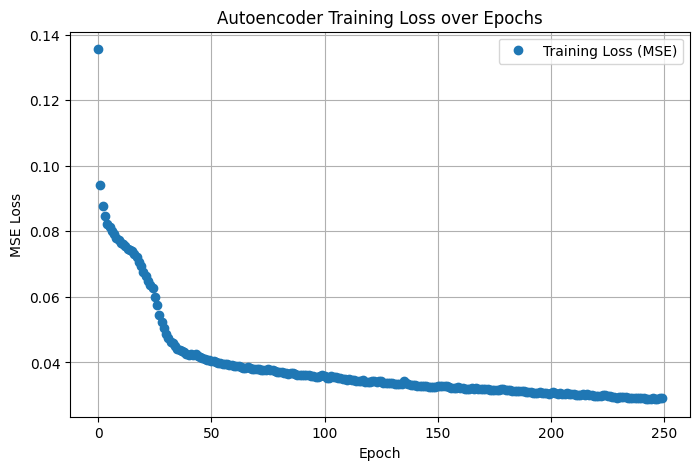

In [24]:
import matplotlib.pyplot as plt

# Extract loss from training history
loss_values = hist.history['loss']

plt.figure(figsize=(8,5))
plt.plot(loss_values, 'o', label='Training Loss (MSE)')
plt.title('Autoencoder Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.legend()
plt.show()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
(300, 2)


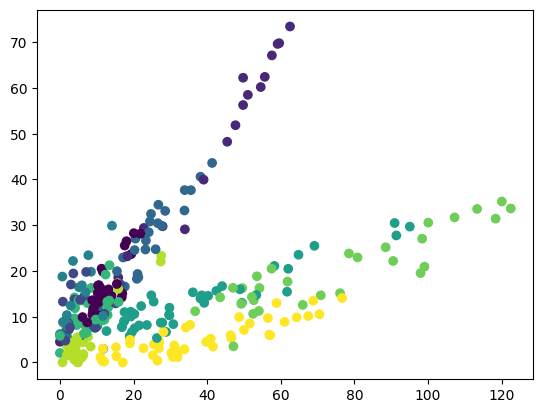

In [25]:
# dividing the model into encoder and decoder
s_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/ae_model.keras')

#s_model.summary()
enc_model = tf.keras.models.Model(inputs = s_model.layers[0].input, outputs = s_model.layers[2].output)
#enc_model.summary()
dec_model = tf.keras.models.Model(inputs=s_model.layers[3].input, outputs = s_model.layers[-1].output)
#dec_model.summary()


# generation of lspace graph
def l_space(d, o, m):
  ev = m.predict(d)
  print(ev.shape)
  plt.scatter(ev[:,0], ev[:,1], c=o)
  plt.show()

l_space(t_x, t_y, enc_model)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted output shape: (300, 784)
Reshaped images: (300, 28, 28)


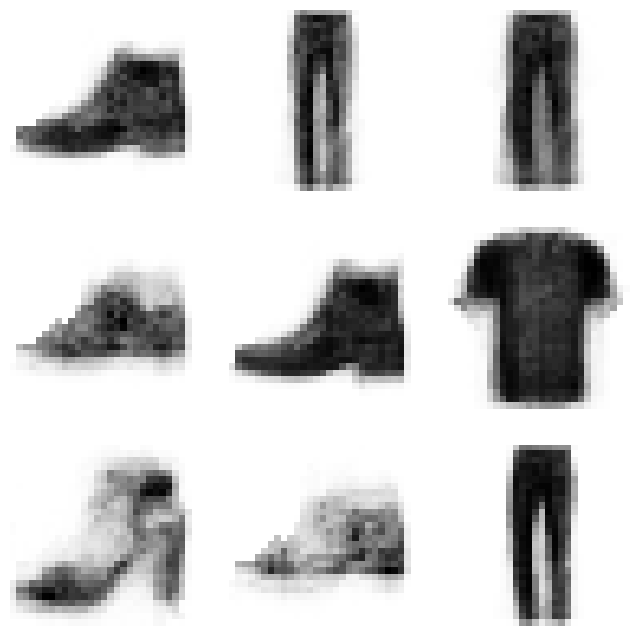

In [26]:
import matplotlib.pyplot as plt
import numpy as np

def out_img(d, m, n):
    # Get model predictions
    res = m.predict(d)
    print("Predicted output shape:", res.shape)

    # Reshape flattened predictions back into 28x28 images
    imgs = res.reshape((d.shape[0], 28, 28))
    print("Reshaped images:", imgs.shape)

    # Plot n×n grid of reconstructed images
    plt.figure(figsize=(8,8))
    for i in range(n*n):
        plt.subplot(n, n, i+1)
        plt.imshow(imgs[i], cmap='Greys')
        plt.axis('off')
    plt.show()

# Example usage:
out_img(t_x, s_model, 3)



## Subtask 2

Modify Subtask 1 so that you add three hidden layers and 2 latent features, i.e.
784-10-2-10-784 neurons. Observe differences.



29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/30
235/235 - 4s - 17ms/step - loss: 0.5298 - val_loss: 0.4736
Epoch 2/30
235/235 - 2s - 11ms/step - loss: 0.4348 - val_loss: 0.4172
Epoch 3/30
235/235 - 4s - 15ms/step - loss: 0.4095 - val_loss: 0.4043
Epoch 4/30
235/235 - 3s - 11ms/step - loss: 0.3965 - val_loss: 0.3914
Epoch 5/30
235/235 - 2s - 10ms/step - loss: 0.3857 - val_loss: 0.3830
Epoch 6/30
235/235 - 2s - 10ms/step - loss: 0.3792 - val_loss: 0.3781
Epoch 7/30
235/235 - 2s - 10ms/step - loss: 0.3754 - val_loss: 0.3751
Epoch 8/30
235/235 - 3s - 12ms/step - loss: 0.3728 - val_loss: 0.3729
Epoch 9/30
235/235 - 4s - 19ms/step - loss: 0.3710 - val_loss: 0.3713
Epoch 10/30
235/235 - 3s - 11ms/step - loss: 0.3696 - val_loss: 0.3702
Epoch 11/30
235/235 - 2s - 10ms/step - loss: 0.3686 - val_loss: 0.3693
Epoch 12/30
235/235 - 4s - 16ms/step - l

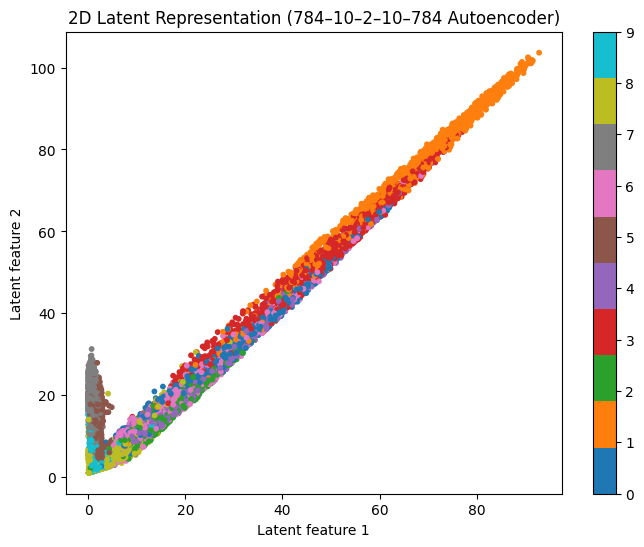

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# ---- Load and preprocess Fashion-MNIST ----
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize and flatten
x_train = train_images.astype('float32') / 255.0
x_test  = test_images.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), 28*28))
x_test  = x_test.reshape((len(x_test), 28*28))

# ---- Build the deeper Autoencoder ----
from tensorflow.keras import layers, models

input_img = tf.keras.Input(shape=(784,))

# Encoder
h1 = layers.Dense(10, activation='relu')(input_img)
latent = layers.Dense(2, activation='relu')(h1)

# Decoder
h2 = layers.Dense(10, activation='relu')(latent)
output = layers.Dense(784, activation='sigmoid')(h2)

# Autoencoder & Encoder models
autoencoder = tf.keras.Model(input_img, output)
encoder = tf.keras.Model(input_img, latent)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# ---- Train ----
history = autoencoder.fit(
    x_train, x_train,
    epochs=30,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test),
    verbose=2
)

# ---- Encode test data ----
encoded_imgs = encoder.predict(x_test)
print("Encoded latent features shape:", encoded_imgs.shape)

# ---- Plot latent space (2D) ----
plt.figure(figsize=(8,6))
scatter = plt.scatter(encoded_imgs[:,0], encoded_imgs[:,1],
                      c=test_labels, cmap='tab10', s=10)
plt.colorbar(scatter, ticks=range(10))
plt.title('2D Latent Representation (784–10–2–10–784 Autoencoder)')
plt.xlabel('Latent feature 1')
plt.ylabel('Latent feature 2')
plt.show()


## Subtask 3

Modify Subtask 1 so that you add convolution layers, pooling layers, ... for the autoencoder and observe differences.


In [28]:
from tensorflow.keras import models, layers
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [45]:
import numpy as np
import random as rnd

t_x = []
t_y = []

idx_list = {c: np.where(train_images == c)[0] for c in range(3)}

for c in range(3):
  selected_idx = rnd.sample(list(idx_list[c]), 100)
  for idx in selected_idx:
    t_x += [np.ndarray.flatten(train_images[idx])]
    t_y += [train_labels[idx]]

t_x = np.array(t_x, dtype=np.float32)/255.0

print(len(t_x))
print(len(t_y))

300
300


In [81]:
x_train_images = t_x.reshape(-1, 28, 28, 1)

inputs = layers.Input(shape = (28,28,1))

#encoder
x = layers.Conv2D(16, (3,3), activation = "relu", padding="same")(inputs)
x = tf.keras.layers.MaxPooling2D((2,2), padding="same")(x)

x = layers.Conv2D(8, (3,3), activation = "relu", padding="same")(x)
x = layers.MaxPooling2D((2,2),padding="same")(x)

# bottle neck
x = layers.Flatten()(x)
bottleneck = layers.Dense(16, activation = "linear", name = "bottleneck")(x)

#decoder
x = layers.Dense(7*7*8, activation = "relu")(bottleneck)
x = layers.Reshape((7,7,8))(x)

x = layers.Conv2DTranspose(8, (3,3), strides = 2, activation = "relu", padding="same")(x)
x = layers.Conv2DTranspose(16, (3,3), strides = 2, activation = "relu", padding="same")(x)
outputs = layers.Conv2D(1, (3,3), activation = "sigmoid", padding="same")(x)

cae = models.Model(inputs, outputs)
cae.summary()


Model: "functional_63"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_21 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 14, 14, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 392)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck (Dense)              │ (None, 16)             │         6,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 392)            │         6,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_14 (Reshape)            │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_26             │ (None, 14, 14, 8)      │           584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_27             │ (None, 28, 28, 16)     │         1,168 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 28, 28, 1)      │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,169 (63.16 KB)

 Trainable params: 16,169 (63.16 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
cae.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005), loss = "binary_crossentropy")
history = cae.fit(x_train_images, x_train_images, epochs = 100, batch_size = 10, shuffle=True, verbose = 2)

Epoch 1/100
30/30 - 3s - 109ms/step - loss: 0.6044
Epoch 2/100
30/30 - 0s - 17ms/step - loss: 0.4980
Epoch 3/100
30/30 - 0s - 16ms/step - loss: 0.4257
Epoch 4/100
30/30 - 1s - 18ms/step - loss: 0.3698
Epoch 5/100
30/30 - 0s - 16ms/step - loss: 0.3478
Epoch 6/100
30/30 - 1s - 17ms/step - loss: 0.3332
Epoch 7/100
30/30 - 0s - 16ms/step - loss: 0.3289
Epoch 8/100
30/30 - 1s - 21ms/step - loss: 0.3215
Epoch 9/100
30/30 - 0s - 17ms/step - loss: 0.3166
Epoch 10/100
30/30 - 1s - 17ms/step - loss: 0.3152
Epoch 11/100
30/30 - 0s - 16ms/step - loss: 0.3117
Epoch 12/100
30/30 - 0s - 16ms/step - loss: 0.3075
Epoch 13/100
30/30 - 0s - 16ms/step - loss: 0.3053
Epoch 14/100
30/30 - 0s - 16ms/step - loss: 0.3052
Epoch 15/100
30/30 - 1s - 20ms/step - loss: 0.3049
Epoch 16/100
30/30 - 0s - 16ms/step - loss: 0.3009
Epoch 17/100
30/30 - 1s - 21ms/step - loss: 0.2985
Epoch 18/100
30/30 - 0s - 16ms/step - loss: 0.2975
Epoch 19/100
30/30 - 1s - 25ms/step - loss: 0.2970
Epoch 20/100
30/30 - 1s - 44ms/step - l

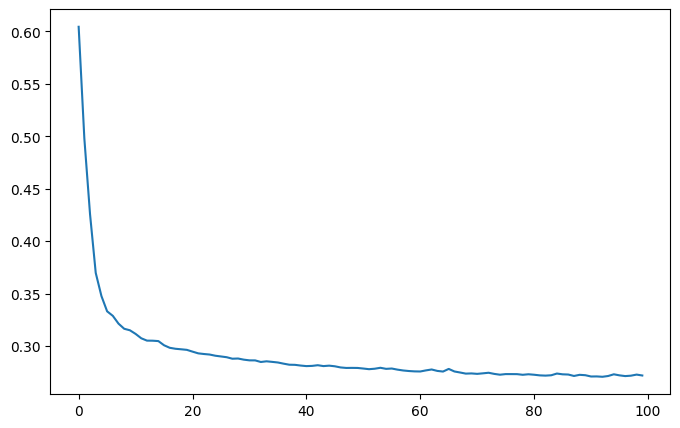

In [84]:
plt.figure(figsize = (8,5))
plt.plot(history.history["loss"], label = "Training Loss")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


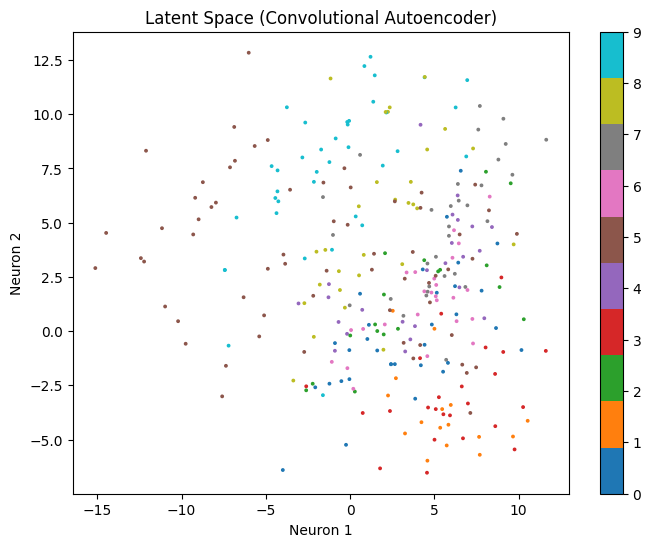

In [85]:
encoder_c = tf.keras.Model(inputs=cae.input, outputs=cae.get_layer("bottleneck").output)
latent_c = encoder_c.predict(x_train_images)

plt.figure(figsize=(8,6))
plt.scatter(latent_c[:,0], latent_c[:,1], c=t_y, cmap="tab10", s=3)
plt.colorbar()
plt.title("Latent Space (Convolutional Autoencoder)")
plt.xlabel("Neuron 1")
plt.ylabel("Neuron 2")
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted output shape: (300, 28, 28, 1)
Reshaped images: (300, 28, 28)


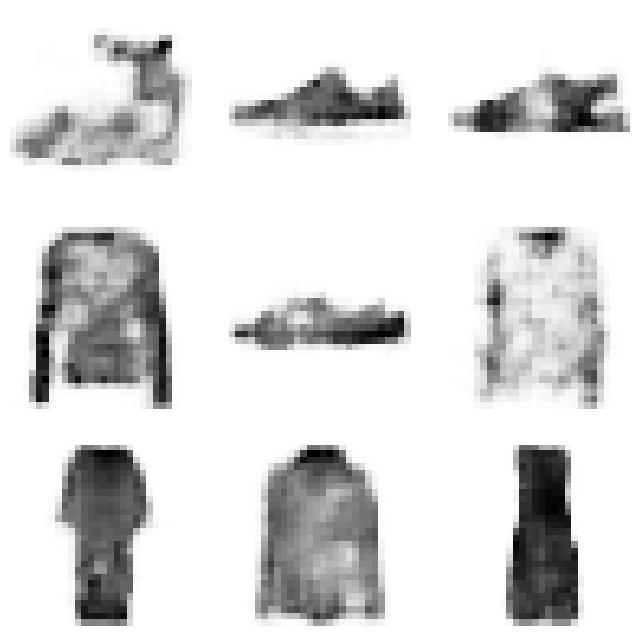

In [86]:
import matplotlib.pyplot as plt
import numpy as np

def out_img(d, m, n):
    # Get model predictions
    res = m.predict(d)
    print("Predicted output shape:", res.shape)

    # Reshape flattened predictions back into 28x28 images
    imgs = res.reshape((d.shape[0], 28, 28))
    print("Reshaped images:", imgs.shape)

    # Plot n×n grid of reconstructed images
    plt.figure(figsize=(8,8))
    for i in range(n*n):
        plt.subplot(n, n, i+1)
        plt.imshow(imgs[i], cmap='Greys')
        plt.axis('off')
    plt.show()

# Example usage:
out_img(x_train_images, cae, 3)



## Subtask 4

Extract the decoder from the autoencoder of subtask 1-3 and generate new images based on randomly generated latent features. Plot generated images.



In [ ]:
Write your code here